In [1]:
!pip install --upgrade --force-reinstall numpy==1.26.4 --no-deps
!pip install --upgrade --force-reinstall matplotlib==3.10.6 --no-deps
!pip install --upgrade --force-reinstall scikit-learn==1.6.1 --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## Spliting our Data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df,
                               test_size=0.2,
                               stratify=df['Class'],
                               random_state=10
                               )

In [6]:
X_train, X_test = train.drop('Class', axis=1), test.drop('Class', axis=1)
y_train, y_test = train['Class'], test['Class']

#### ignoring warnings

In [7]:
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")

# Loading Models

In [8]:
import joblib

# load the models that trained and its hyperparameters has been selected by GreedSearchCV
model_lr = joblib.load('/kaggle/input/credit-card-fraud-detection-lrlgbm/scikitlearn/default/1/Logistic-Regression.pkl')
model_lgbm = joblib.load('/kaggle/input/credit-card-fraud-detection-lrlgbm/scikitlearn/default/1/LGBM.pkl')


optimized_threshold_lr = 5.342830925946151
optimized_threshold_lgbm = 0.7945137194363832


#### **LogisticRegression**

In [9]:
model_lr

Pipeline(steps=[('transformation',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Time_rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7cbc3a118ea0>,
                                                                      kw_args={'Y': [[79000]],
                                                                               'gamma': 1e...
                                                 ('V5_amount',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['V5', 'Amount']),
                                                 ('V7_amount',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['V7', 'Amount'])])),
                ('logistic_r',
                 LogisticRegression(l1_ratio=0.8, max_iter=1000, n_jobs=-1,
                                    penalty='elasticnet', random_state=10,
                                    solver='saga'))])

#### **LGBM**

In [10]:
model_lgbm

Pipeline(steps=[('transformation',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Time_rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x7cbc3a118ea0>,
                                                                      kw_args={'Y': [[79000]],
                                                                               'gamma': 1e...
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['V5', 'Amount']),
                                                 ('V7_amount',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['V7', 'Amount'])])),
                ('lgbm',
                 LGBMClassifier(data_sample_strategy='goss', learning_rate=0.2,
                                n_jobs=-1, num_leaves=70, random_state=10,
                                subsample=0.5, verbose=-1))])

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
precision_score,
recall_score,
f1_score,
roc_auc_score,
roc_curve,
precision_recall_curve
)

## **LGBM**

In [12]:
# setting the optimized threshold
y_scores_test = model_lgbm.predict_proba(X_test)[:, 1]
test_predit_lgbm = (y_scores_test >= optimized_threshold_lgbm)


#### F1 score LGBM

In [13]:
f1_score(y_test, test_predit_lgbm)

0.8571428571428571

In [14]:
y_score_lgbm = model_lgbm.predict_proba(X_test)[:, 1]

#### roc_curve LGBM

In [15]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_lgbm)

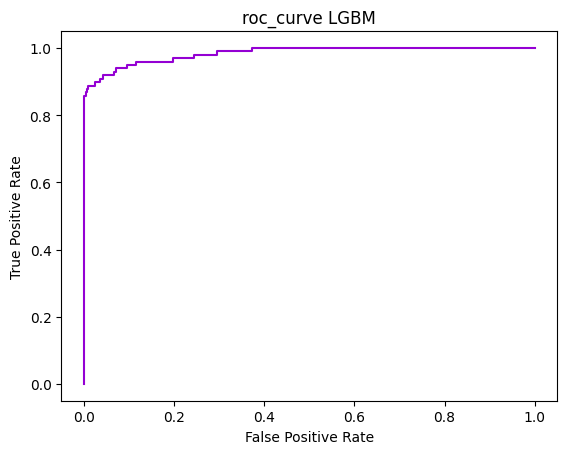

In [16]:
plt.plot(fpr, tpr, color='darkviolet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve LGBM')
plt.show()

#### roc_auc_score LGBM

In [17]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_score_lgbm)
auc

0.9838212261550654

In [18]:
y_score_lgbm = model_lgbm.predict_proba(X_test)[:, 1]

#### Recall Precision LGBM

In [19]:
precision, recall, thresholds = precision_recall_curve(
    y_true=y_test,
    y_score=y_score_lgbm,
)

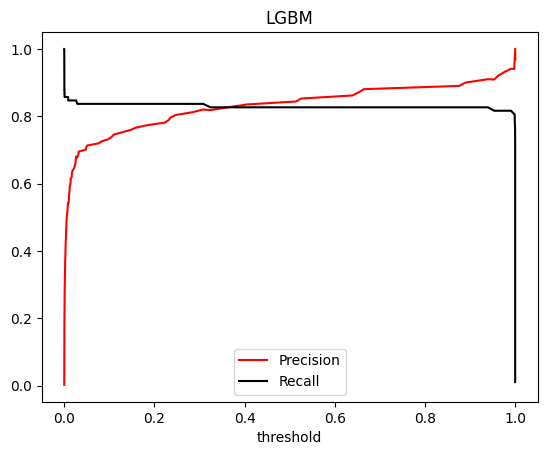

In [20]:
fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1], color='red', label='Precision')
ax.plot(thresholds, recall[:-1], color='black', label='Recall')
plt.xlabel('threshold')
plt.title("LGBM")
ax.legend()

plt.show()

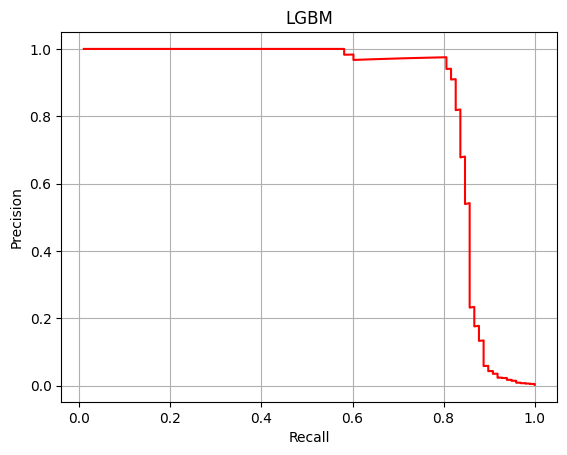

In [21]:
fig, ax = plt.subplots()
ax.plot(recall[:-1], precision[:-1], color='red',)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.title("LGBM")
plt.show()

## Logistic Regression

In [22]:
# setting the optimized threshold
y_scores_test = model_lr.decision_function(X_test)
test_predict_lr = (y_scores_test >= optimized_threshold_lr)

#### f1 score for lr

In [23]:
f1_score(y_test, test_predict_lr)

0.76

In [24]:
y_score_lr = model_lr.decision_function(X_test)

In [25]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_lr)

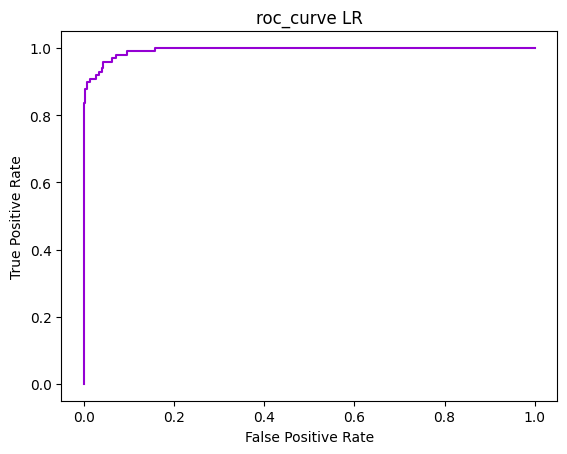

In [26]:
plt.plot(fpr, tpr, color='darkviolet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve LR')
plt.show()

### roc_auc_score

In [27]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_score_lr)
auc

0.9936798720613739

#### Recall Precision LR

In [28]:
precision, recall, thresholds = precision_recall_curve(
    y_true=y_test,
    y_score=y_score_lr,
)

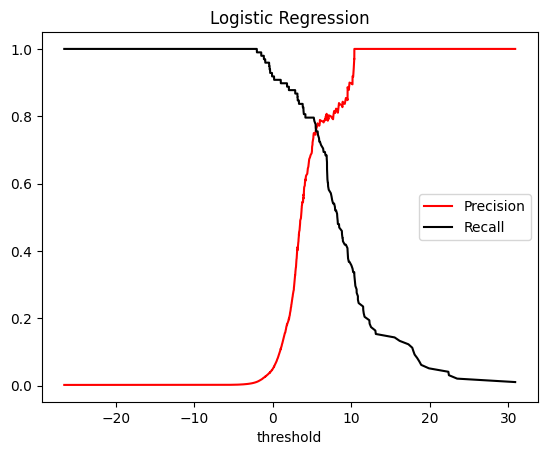

In [29]:
fig, ax = plt.subplots()
ax.plot(thresholds, precision[:-1], color='red', label='Precision')
ax.plot(thresholds, recall[:-1], color='black', label='Recall')
plt.xlabel('threshold')
plt.title("Logistic Regression")
ax.legend()

plt.show()

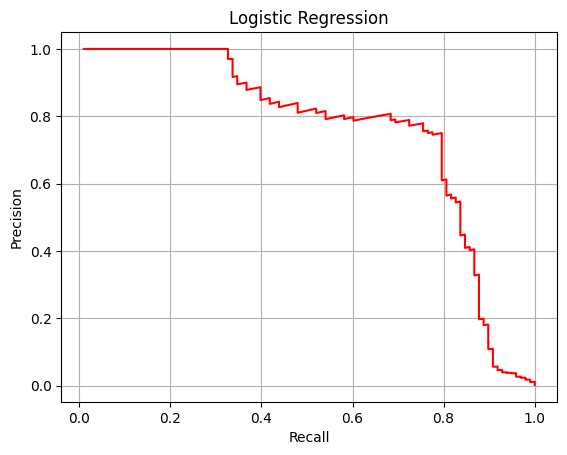

In [30]:
fig, ax = plt.subplots()
ax.plot(recall[:-1], precision[:-1], color='red',)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.title("Logistic Regression")

plt.show()

# Comparison

In [31]:
data_test = {
    'Model':['Logistic Regression', 'LGBM'],
    'Precision_Score':[precision_score(y_test, test_predict_lr), precision_score(y_test, test_predit_lgbm)],
    'Recall_Score':[recall_score(y_test, test_predict_lr), precision_score(y_test, test_predit_lgbm)],
    'F1_Score':[f1_score(y_test, test_predict_lr), f1_score(y_test, test_predit_lgbm)],
    'roc_auc_score':[roc_auc_score(y_test, y_score_lr), roc_auc_score(y_test, y_score_lgbm)],
}

In [32]:
diff_test = pd.DataFrame(data_test)
diff_test

,Model,Precision_Score,Recall_Score,F1_Score,roc_auc_score
0,Logistic Regression,0.745098,0.77551,0.760000,0.993680
1,LGBM,0.890110,0.89011,0.857143,0.983821



**The thresholds are tuned.
Achieved high accuracy and reliable detection of fraudulent transactions with LightGBM outperforming Logistic Regression.**